In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
df = pd.read_csv('Groceries_dataset.csv')

In [5]:
print(df.columns)

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


In [6]:
df.rename(columns={'Member_number': 'TransactionID'}, inplace=True)
df.rename(columns={'itemDescription': 'Item'}, inplace=True)

In [8]:
basket = df.groupby(['TransactionID', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('TransactionID')

# Use .applymap() equivalent approach
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [9]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support                 itemsets
0  0.015393  (Instant food products)
1  0.078502               (UHT-milk)
2  0.031042          (baking powder)
3  0.119548                   (beef)
4  0.079785                (berries)


In [10]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                 antecedents                     consequents   
0                                 (UHT-milk)                 (bottled water)  \
1                                 (UHT-milk)              (other vegetables)   
2                                 (UHT-milk)                     (pip fruit)   
3                                 (UHT-milk)                    (rolls/buns)   
4                                 (UHT-milk)               (root vegetables)   
...                                      ...                             ...   
5839              (yogurt, rolls/buns, soda)  (other vegetables, whole milk)   
5840        (yogurt, other vegetables, soda)        (rolls/buns, whole milk)   
5841    (rolls/buns, other vegetables, soda)            (yogurt, whole milk)   
5842        (yogurt, rolls/buns, whole milk)        (other vegetables, soda)   
5843  (yogurt, rolls/buns, other vegetables)              (whole milk, soda)   

       support  confidence      lift  


In [11]:
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]
print(filtered_rules)

                                            antecedents         consequents   
216                                 (canned vegetables)        (whole milk)  \
217                                          (cat food)  (other vegetables)   
223                                          (cat food)        (whole milk)   
233                                       (chewing gum)        (whole milk)   
253                                         (chocolate)        (whole milk)   
...                                                 ...                 ...   
5821    (shopping bags, yogurt, rolls/buns, whole milk)  (other vegetables)   
5822  (shopping bags, yogurt, other vegetables, whol...        (rolls/buns)   
5825  (shopping bags, yogurt, other vegetables, roll...        (whole milk)   
5832             (yogurt, rolls/buns, whole milk, soda)  (other vegetables)   
5835       (yogurt, rolls/buns, other vegetables, soda)        (whole milk)   

      antecedent support  consequent support   supp

In [12]:
strong_rules = rules[(rules['lift'] > 1.2) & (rules['conviction'] > 1.5)]
print(strong_rules)

                                            antecedents         consequents   
799                                 (UHT-milk, sausage)  (other vegetables)  \
805                                  (yogurt, UHT-milk)  (other vegetables)   
834                                 (canned beer, beef)        (whole milk)   
914                          (beef, whipped/sour cream)        (whole milk)   
924                                (pip fruit, berries)  (other vegetables)   
...                                                 ...                 ...   
5809    (yogurt, other vegetables, sausage, whole milk)        (rolls/buns)   
5811    (yogurt, rolls/buns, other vegetables, sausage)        (whole milk)   
5821    (shopping bags, yogurt, rolls/buns, whole milk)  (other vegetables)   
5825  (shopping bags, yogurt, other vegetables, roll...        (whole milk)   
5835       (yogurt, rolls/buns, other vegetables, soda)        (whole milk)   

      antecedent support  consequent support   supp

In [13]:
strong_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.6)]
print(strong_rules)

                                            antecedents         consequents   
799                                 (UHT-milk, sausage)  (other vegetables)  \
805                                  (yogurt, UHT-milk)  (other vegetables)   
1765                            (butter, cream cheese )        (whole milk)   
2158                 (chocolate, fruit/vegetable juice)        (whole milk)   
2180                             (chocolate, pip fruit)        (whole milk)   
2643                              (domestic eggs, meat)        (whole milk)   
2997                                      (pastry, ham)        (whole milk)   
3023                        (pip fruit, hamburger meat)        (whole milk)   
4153                       (soda, UHT-milk, whole milk)  (other vegetables)   
4159                           (rolls/buns, beef, soda)  (other vegetables)   
4201           (bottled beer, pastry, other vegetables)        (whole milk)   
4267                 (yogurt, rolls/buns, bottled be

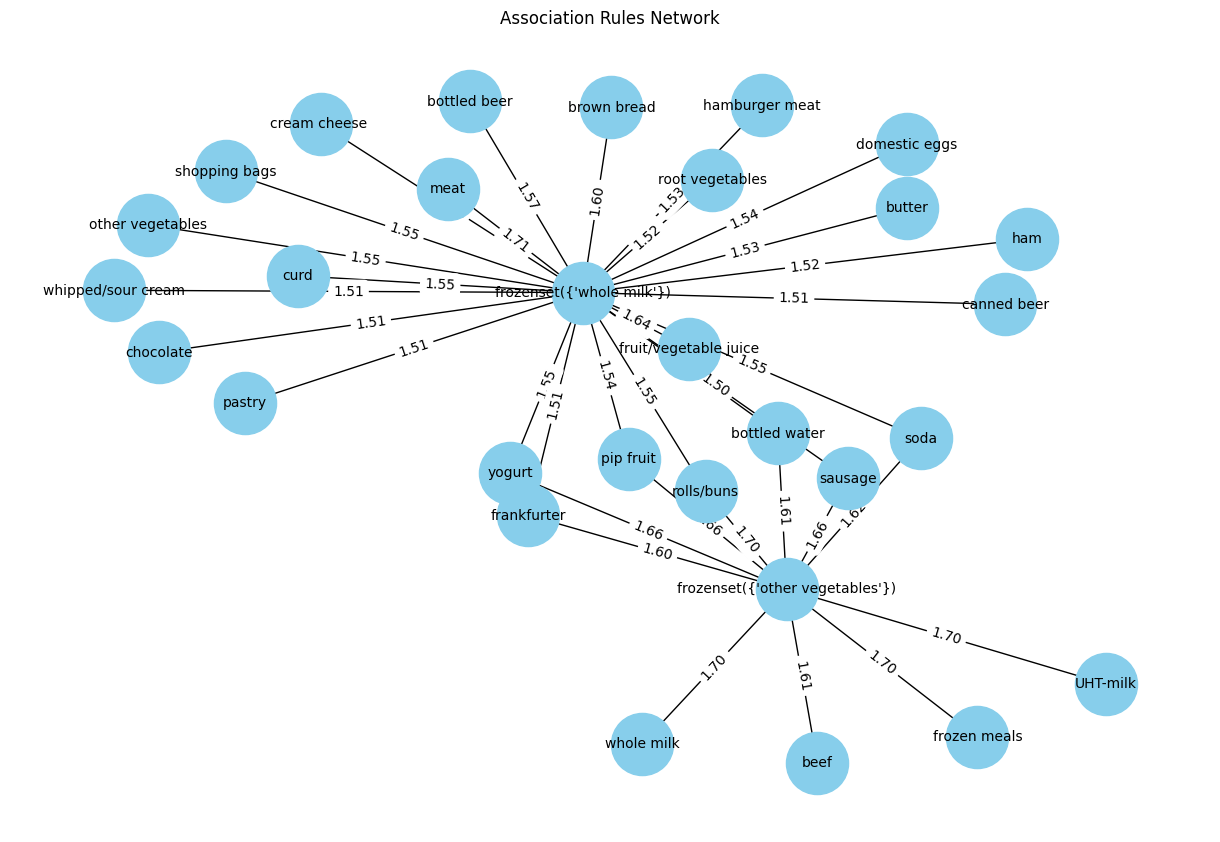

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges
for index, row in strong_rules.iterrows():
    for antecedent in row['antecedents']:
        G.add_edge(antecedent, row['consequents'], weight=row['lift'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
edges = G.edges(data=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})
plt.title("Association Rules Network")
plt.show()


In [15]:
strong_rules = rules[(rules['support'] > 0.01) & (rules['confidence'] > 0.6) & (rules['lift'] > 1.5)]
print(strong_rules)

                                            antecedents         consequents   
799                                 (UHT-milk, sausage)  (other vegetables)  \
805                                  (yogurt, UHT-milk)  (other vegetables)   
1765                            (butter, cream cheese )        (whole milk)   
2158                 (chocolate, fruit/vegetable juice)        (whole milk)   
2180                             (chocolate, pip fruit)        (whole milk)   
2643                              (domestic eggs, meat)        (whole milk)   
2997                                      (pastry, ham)        (whole milk)   
3023                        (pip fruit, hamburger meat)        (whole milk)   
4153                       (soda, UHT-milk, whole milk)  (other vegetables)   
4159                           (rolls/buns, beef, soda)  (other vegetables)   
4201           (bottled beer, pastry, other vegetables)        (whole milk)   
4267                 (yogurt, rolls/buns, bottled be

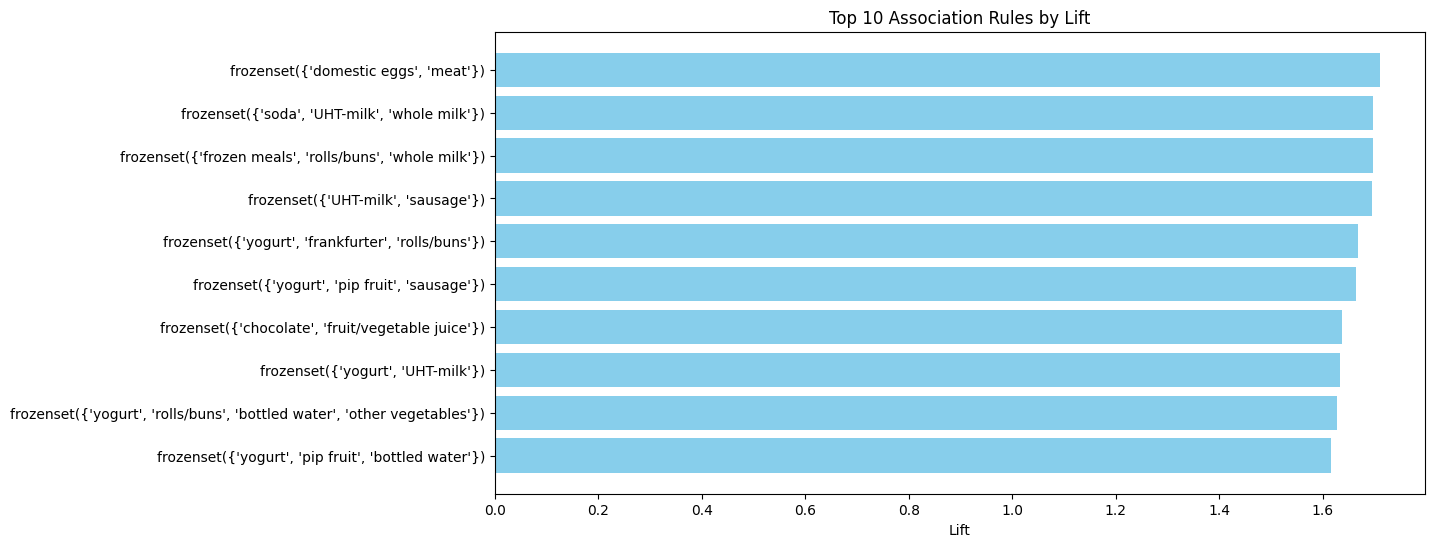

In [16]:
import matplotlib.pyplot as plt

# Get top rules by lift
top_rules = strong_rules.nlargest(10, 'lift')

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_rules['antecedents'].astype(str), top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Reverse the order
plt.show()


In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample DataFrame
# Assuming df is your DataFrame containing 'TransactionID', 'Date', and 'Item'

# Step 1: Group by TransactionID
grouped_df = df.groupby('TransactionID')['Item'].apply(list).reset_index()

# Step 2: Create a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

# Transform the grouped data into one-hot encoded format
te = TransactionEncoder()
onehot = te.fit(grouped_df['Item']).transform(grouped_df['Item'])
onehot_df = pd.DataFrame(onehot, columns=te.columns_)

# Step 3: Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.01, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Filter rules for whole milk
whole_milk_rules = rules[rules['consequents'].apply(lambda x: 'whole milk' in x)]
print(whole_milk_rules)


                          antecedents   
52                         (UHT-milk)  \
62                    (baking powder)   
122                            (beef)   
175                         (berries)   
308                    (bottled beer)   
...                               ...   
15254  (rolls/buns, other vegetables)   
15255                          (soda)   
15257                        (yogurt)   
15258                    (rolls/buns)   
15259              (other vegetables)   

                                             consequents  antecedent support   
52                                          (whole milk)            0.078502  \
62                                          (whole milk)            0.031042   
122                                         (whole milk)            0.119548   
175                                         (whole milk)            0.079785   
308                                         (whole milk)            0.158799   
...                        

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'basket' is your DataFrame with the transaction data
# Apply the apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [19]:
print(rules_df.columns)

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')


In [20]:
print(rules_df.head())
print(rules_df.columns)
print(rules_df.isnull().sum())

      antecedents      consequents  antecedent support  consequent support   
0      (UHT-milk)           (beef)            0.078502            0.119548  \
1          (beef)       (UHT-milk)            0.119548            0.078502   
2      (UHT-milk)   (bottled beer)            0.078502            0.158799   
3  (bottled beer)       (UHT-milk)            0.158799            0.078502   
4      (UHT-milk)  (bottled water)            0.078502            0.213699   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.010518    0.133987  1.120775  0.001133    1.016672       0.116940  
1  0.010518    0.087983  1.120775  0.001133    1.010396       0.122392  
2  0.014879    0.189542  1.193597  0.002413    1.037933       0.176014  
3  0.014879    0.093700  1.193597  0.002413    1.016769       0.192815  
4  0.021293    0.271242  1.269268  0.004517    1.078960       0.230217  
Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'supp

In [22]:
# Drop rows with NaN in 'consequents'
rules_df = rules_df.dropna(subset=['consequents'])

# Alternatively, if you prefer to fill NaN values:
# rules_df['consequents'] = rules_df['consequents'].fillna('No Consequent')
rules_df['consequents'] = rules_df['consequents'].astype(str)
# Filter rules for those where 'consequents' contain 'whole milk'
whole_milk_rules = rules_df[rules_df['consequents'].str.contains('whole milk', na=False)]

# Sorting by lift and confidence
top_rules = whole_milk_rules.sort_values(by=['lift', 'confidence'], ascending=False)

# Display the top rules
top_rules = top_rules[['antecedents', 'consequents', 'lift', 'confidence']]
print(top_rules.head(10))
print(f"Shape of rules_df: {rules_df.shape}")

                                  antecedents   
15192                    (yogurt, rolls/buns)  \
15184  (yogurt, rolls/buns, other vegetables)   
12796                          (yogurt, curd)   
15193              (yogurt, other vegetables)   
15187                   (rolls/buns, sausage)   
7025                                   (meat)   
15188             (other vegetables, sausage)   
15219                 (shopping bags, yogurt)   
7023                          (domestic eggs)   
15186                       (yogurt, sausage)   

                                             consequents      lift  confidence  
15192  frozenset({'other vegetables', 'sausage', 'who...  2.428689    0.122120  
15184               frozenset({'sausage', 'whole milk'})  2.428575    0.259804  
12796               frozenset({'sausage', 'whole milk'})  2.322046    0.248408  
15193  frozenset({'rolls/buns', 'sausage', 'whole mil...  2.318415    0.113006  
15187  frozenset({'yogurt', 'other vegetables', 'whol..

In [23]:
# Assuming your DataFrame is named 'rules_df'
# Filtering rules for those where 'consequents' contain 'whole milk'
whole_milk_rules = rules_df[rules_df['consequents'].str.contains('whole milk')]

# Sorting by lift and confidence
top_rules = whole_milk_rules.sort_values(by=['lift', 'confidence'], ascending=False)

# Displaying the top 10 rules
top_rules = top_rules[['antecedents', 'consequents', 'lift', 'confidence']]
print(top_rules.head(10))

                                  antecedents   
15192                    (yogurt, rolls/buns)  \
15184  (yogurt, rolls/buns, other vegetables)   
12796                          (yogurt, curd)   
15193              (yogurt, other vegetables)   
15187                   (rolls/buns, sausage)   
7025                                   (meat)   
15188             (other vegetables, sausage)   
15219                 (shopping bags, yogurt)   
7023                          (domestic eggs)   
15186                       (yogurt, sausage)   

                                             consequents      lift  confidence  
15192  frozenset({'other vegetables', 'sausage', 'who...  2.428689    0.122120  
15184               frozenset({'sausage', 'whole milk'})  2.428575    0.259804  
12796               frozenset({'sausage', 'whole milk'})  2.322046    0.248408  
15193  frozenset({'rolls/buns', 'sausage', 'whole mil...  2.318415    0.113006  
15187  frozenset({'yogurt', 'other vegetables', 'whol..

In [24]:
# Display the top 10 antecedents based on lift
top_antecedents = top_rules.sort_values(by='lift', ascending=False).head(10)
print(top_antecedents[['antecedents', 'lift', 'confidence']])

                                  antecedents      lift  confidence
15192                    (yogurt, rolls/buns)  2.428689    0.122120
15184  (yogurt, rolls/buns, other vegetables)  2.428575    0.259804
12796                          (yogurt, curd)  2.322046    0.248408
15193              (yogurt, other vegetables)  2.318415    0.113006
15187                   (rolls/buns, sausage)  2.298554    0.165109
7025                                   (meat)  2.294561    0.161290
15188             (other vegetables, sausage)  2.220629    0.146409
15219                 (shopping bags, yogurt)  2.219947    0.182243
7023                          (domestic eggs)  2.208999    0.077071
15186                       (yogurt, sausage)  2.195940    0.180272


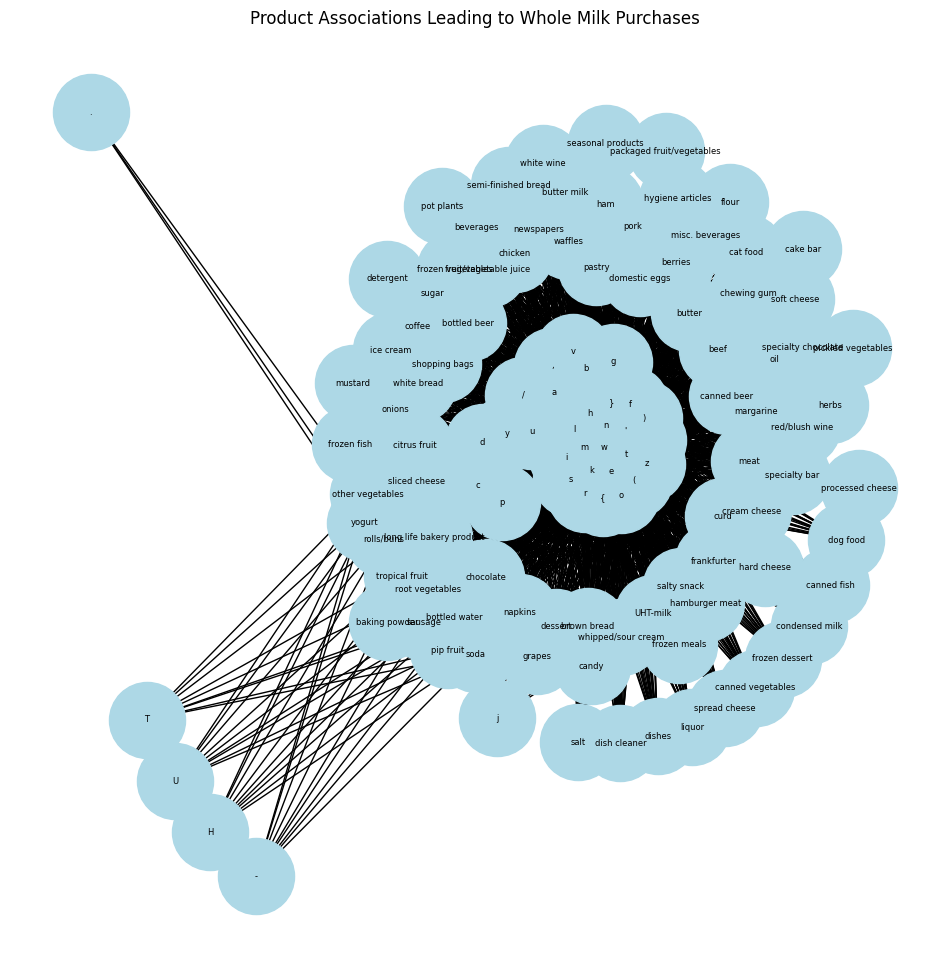

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the filtered rules
G = nx.Graph()

# Add edges for each antecedent and consequent
for index, row in whole_milk_rules.iterrows():
    antecedents = row['antecedents']  # Use directly as it is already a frozenset
    consequents = row['consequents']   # Use directly as it is already a frozenset

    # Add edges for each antecedent to each consequent
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.7)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')
plt.title("Product Associations Leading to Whole Milk Purchases")
plt.axis('off')  # Turn off the axis
plt.show()


In [31]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Load dataset
df = pd.read_csv('Groceries_dataset.csv')  # Replace with your dataset path

# Rename columns
df.rename(columns={'Member_number': 'TransactionID', 'itemDescription': 'Item'}, inplace=True)

# Group data
basket = df.groupby(['TransactionID', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('TransactionID')

# Apply binary encoding
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Get frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# User input for item(s)
user_input = input("Enter item(s) separated by a comma (e.g., 'beef' or 'beef, bread'): ")
items = [item.strip() for item in user_input.split(',')]

# Find rules where the input items are in the antecedents or consequents
matching_rules = rules[(rules['antecedents'].apply(lambda x: any(item in x for item in items))) | 
                       (rules['consequents'].apply(lambda x: any(item in x for item in items)))]

# Check if any rules are found
if not matching_rules.empty:
    print(f"Rules found for: {user_input}")
    print(matching_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'zhangs_metric']])
else:
    print(f"No rules found for: {user_input}")


Rules found for: whole milk, yogurt
              antecedents                                        consequents   
52             (UHT-milk)                                       (whole milk)  \
53           (whole milk)                                         (UHT-milk)   
54               (yogurt)                                         (UHT-milk)   
55             (UHT-milk)                                           (yogurt)   
62        (baking powder)                                       (whole milk)   
...                   ...                                                ...   
15255              (soda)  (yogurt, rolls/buns, other vegetables, whole m...   
15256        (whole milk)       (yogurt, rolls/buns, other vegetables, soda)   
15257            (yogurt)   (rolls/buns, whole milk, other vegetables, soda)   
15258        (rolls/buns)       (yogurt, whole milk, other vegetables, soda)   
15259  (other vegetables)             (yogurt, rolls/buns, whole milk, soda)   

   